# Financial Planning with APIs and Simulations

This project entails building a tool to help credit union members evaluate their financial health. In the first part, we will create a financial planner for emergencies and the second part, we will create a financial planner for retirement.

In [102]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [103]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Creating a Financial Planner for Emergencies

### Evaluating the Cryptocurrency Wallet by Using the Requests Library

In [13]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Creating a variable named `monthly_income`, and setting its value to `12000`.

In [104]:
monthly_income = 12000

#### Reviewing the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [105]:
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Using the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [106]:
# Making an API call to access the current price of BTC by using the Python requests library
btc_response = requests.get(btc_url).json()

# Reviewing the response data from the API call
print(json.dumps(btc_response, indent=2, sort_keys=True))

{
  "data": {
    "1": {
      "circulating_supply": 18948431,
      "id": 1,
      "last_updated": 1643957304,
      "max_supply": 21000000,
      "name": "Bitcoin",
      "quotes": {
        "USD": {
          "market_cap": 720820170208,
          "percent_change_1h": 0.941215058397499,
          "percent_change_24h": 2.77886501653657,
          "percent_change_7d": 1.97623701203064,
          "percentage_change_1h": 0.941215058397499,
          "percentage_change_24h": 2.77886501653657,
          "percentage_change_7d": 1.97623701203064,
          "price": 38014.0,
          "volume_24h": 16923957318
        }
      },
      "rank": 1,
      "symbol": "BTC",
      "total_supply": 18948431,
      "website_slug": "bitcoin"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3105,
    "timestamp": 1643957304
  }
}


In [107]:
# Making an API call to access the current price ETH by using the Python requests library
eth_response = requests.get(eth_url).json()

# Reviewing the response data from the API call
print(json.dumps(eth_response, indent=2, sort_keys=True))

{
  "data": {
    "1027": {
      "circulating_supply": 119437656,
      "id": 1027,
      "last_updated": 1643957287,
      "max_supply": 0,
      "name": "Ethereum",
      "quotes": {
        "USD": {
          "market_cap": 334335731489,
          "percent_change_1h": 1.03841378126269,
          "percent_change_24h": 5.38542057388147,
          "percent_change_7d": 16.0559242746762,
          "percentage_change_1h": 1.03841378126269,
          "percentage_change_24h": 5.38542057388147,
          "percentage_change_7d": 16.0559242746762,
          "price": 2799.11,
          "volume_24h": 13945082432
        }
      },
      "rank": 2,
      "symbol": "ETH",
      "total_supply": 119437656,
      "website_slug": "ethereum"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3105,
    "timestamp": 1643957287
  }
}


#### Step 3: Navigating the JSON response object to access the current price of each coin, and storing each in a variable.

In [108]:
btc_price = btc_response['data']['1']['quotes']['USD']['price']

print(f"The price for Bitcoin is ${btc_price}")

The price for Bitcoin is $38014.0


In [109]:
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

print(f"The price for Ethereum is ${eth_price}")

The price for Ethereum is $2799.11


### Step 4: Calculating the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [47]:
# Computing the current value of the BTC holding 
btc_value = btc_price * btc_coins

print(f"The current value of the {btc_coins} BTC coins is ${btc_value: .2f}")

The current value of the 1.2 BTC coins is $ 46227.60


In [110]:
# Computing the current value of the ETH holding 
eth_value = eth_price * eth_coins

print(f"The current value of the {eth_coins} ETH coins is ${eth_value: .2f}")

The current value of the 5.3 ETH coins is $ 14835.28


In [111]:
# Computing the total value of the cryptocurrency wallet
total_crypto_wallet = btc_value + eth_value

print(f"The current cryptocurrency wallet balance is ${total_crypto_wallet: .2f}")

The current cryptocurrency wallet balance is $ 61062.88


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

#### Reviewing the total number of shares held in both (SPY) and (AGG).

In [112]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: Setting the variables for the Alpaca API and secret keys. Creating the Alpaca `tradeapi.REST` object by using the Alpaca SDK. Including the parameters for the Alpaca API key, the secret key, and the version number in this object.

In [25]:
# Setting the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Creating the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")


#### Step 2: Setting parameters for the Alpaca API call:

In [113]:
# Setting the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Setting timeframe to 1D 
timeframe = "1D"

# Setting both the start and end date and formating current date as ISO format
start_date = pd.Timestamp("2022-01-28", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-28", tz="America/New_york").isoformat()

#### Step 3: Getting the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Formatting the response as a Pandas DataFrame.

In [114]:
prices_df = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date).df

prices_df.head()

AGG                                      SPY  \
                             open    high     low   close    volume   open   
time                                                                         
2022-01-28 00:00:00-05:00  111.46  111.86  111.44  111.81  10400422  432.7   

                                                           
                          high     low   close     volume  
time                                                       
2022-01-28 00:00:00-05:00  442  427.82  441.92  142062305

#### Step 4: Selecting the `SPY` and `AGG` closing prices, and storing them as variables by navigating the Alpaca response DataFrame.

In [115]:
agg_close_price = float(prices_df["AGG"]["close"])

print(agg_close_price)

111.81


In [116]:
spy_close_price = float(prices_df["SPY"]["close"])

print(spy_close_price)

441.92


#### Step 5: Calculating the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and printing the results.

In [117]:
agg_value = agg_close_price * agg_shares

print(f"The current value of the {agg_shares} AGG bonds is ${agg_value: .2f}")

The current value of the 200 AGG bonds is $ 22362.00


In [118]:
spy_value = spy_close_price * spy_shares

print(f"The current value of the {spy_shares} SPY stocks is ${spy_value: .2f}")

The current value of the 110 SPY stocks is $ 48611.20


In [119]:
total_stocks_bonds = agg_value + spy_value

print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds: .2f}")

The current balance of the stock and bond portion of the portfolio is $ 70973.20


In [120]:
# The total value of the member's entire savings portfolio
total_portfolio = total_stocks_bonds + total_crypto_wallet

print(f"The total value of the member's entire savings portfolio is ${total_portfolio: .2f}")

The total value of the member's entire savings portfolio is $ 132036.08


### Evaluating the Emergency Fund

#### Step 1: Creating a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [122]:
savings_data = [total_crypto_wallet, total_stocks_bonds]

print(savings_data)

[61062.883, 70973.20000000001]


#### Step 2: Using the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then displaying this DataFrame.

In [123]:
savings_df = pd.DataFrame(savings_data, columns = ["amount"], index = ["crypto", "stocks/bonds"])

savings_df

,amount
crypto,61062.883
stocks/bonds,70973.200


#### Step 3: Using the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`.

<AxesSubplot:title={'center':'Composition of the portfolio, crypto vs. stocks/bonds'}, ylabel='amount'>

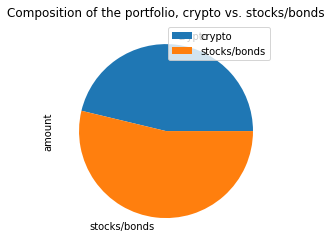

In [124]:
savings_df.plot.pie(y = 'amount', title = 'Composition of the portfolio, crypto vs. stocks/bonds')

#### Step 4: Determining if the current portfolio has enough to create an emergency fund as part of the member’s financial plan by using Python. Ideally, an emergency fund should equal to three times the member’s monthly income. 

##### Step 4-1: Creating a variable named `emergency_fund_value`, and setting it equal to three times the value of the member’s `monthly_income` of 12000.

In [125]:
emergency_fund_value = 3 * monthly_income

##### Step 4-2: Creating a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio.

In [126]:
if total_portfolio > emergency_fund_value:
    print(f"Congratulations! You have enough money in this fund.")
elif total_portfolio == emergency_fund_value:
    print(f"Congratulations! You have reached this important financial goal.")
else:
    print(f"You are ${emergency_fund_value-total_portfolio} away from reaching the goal.")

Congratulations! You have enough money in this fund.


## Part 2: Creating a Financial Planner for Retirement

### Creating the Monte Carlo Simulation

#### Step 1: Making an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [127]:
# Setting start and end dates of 3 years back from your current date
start_date = pd.Timestamp("2019-01-28", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-28", tz="America/New_York").isoformat()

# Setting number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [128]:
# Using the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
historical_closing_prices_df = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=limit_rows).df

# Displaying both the first and last five rows of the DataFrame
display(historical_closing_prices_df.head())
display(historical_closing_prices_df.tail())

AGG                                        \
                             open     high      low     close    volume   
time                                                                      
2019-01-28 00:00:00-05:00  106.62  106.745  106.580  106.6550   6372589   
2019-01-29 00:00:00-05:00  106.73  106.910  106.685  106.9063   5399892   
2019-01-30 00:00:00-05:00  106.79  107.140  106.790  107.1400   4948983   
2019-01-31 00:00:00-05:00  107.30  107.530  107.290  107.4600  11394113   
2019-02-01 00:00:00-05:00  107.09  107.150  106.880  106.9600   5325410   

                              SPY                                      
                             open    high     low     close    volume  
time                                                                   
2019-01-28 00:00:00-05:00  263.39  263.82  261.79  263.6350  75207990  
2019-01-29 00:00:00-05:00  263.92  264.55  262.48  263.3100  54249161  
2019-01-30 00:00:00-05:00  265.10  268.52  264.25  267.4625  75091893  
2019-01-31 00:00:00-05:00  267.51  270.47  267.27  270.2325  73699733  
2019-02-01 00:00:00-05:00  270.15  271.20  269.18  270.0700  68194167

AGG                                       SPY  \
                               open    high     low   close    volume    open   
time                                                                            
2022-01-24 00:00:00-05:00  112.3814  112.42  112.10  112.12  10666672  432.03   
2022-01-25 00:00:00-05:00  112.1800  112.30  111.96  112.00   9392367  433.06   
2022-01-26 00:00:00-05:00  112.0600  112.13  111.36  111.36  10170465  440.72   
2022-01-27 00:00:00-05:00  111.6200  111.88  111.62  111.72   5836124  438.26   
2022-01-28 00:00:00-05:00  111.4600  111.86  111.44  111.81  10400422  432.70   

                                                              
                             high     low   close     volume  
time                                                          
2022-01-24 00:00:00-05:00  440.38  420.76  439.88  233026938  
2022-01-25 00:00:00-05:00  439.72  364.68  434.51  148023735  
2022-01-26 00:00:00-05:00  444.04  428.86  433.45  174214548  
2022-01-27 00:00:00-05:00  441.58  429.45  431.27  136251597  
2022-01-28 00:00:00-05:00  442.00  427.82  441.92  142062305

#### Step 2: Runnig a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plotting the results.

In [129]:
# Configurating the Monte Carlo simulation to forecast 30 years cumulative returns
thirty_year_forecast = MCSimulation(
  portfolio_data = historical_closing_prices_df,
  weights = [.40,.60],
  num_simulation = 500,
  num_trading_days = 252*30
)

# Reviewing the simulation input data
thirty_year_forecast.portfolio_data.head()

AGG                                        \
                             open     high      low     close    volume   
time                                                                      
2019-01-28 00:00:00-05:00  106.62  106.745  106.580  106.6550   6372589   
2019-01-29 00:00:00-05:00  106.73  106.910  106.685  106.9063   5399892   
2019-01-30 00:00:00-05:00  106.79  107.140  106.790  107.1400   4948983   
2019-01-31 00:00:00-05:00  107.30  107.530  107.290  107.4600  11394113   
2019-02-01 00:00:00-05:00  107.09  107.150  106.880  106.9600   5325410   

                                           SPY                            \
                          daily_return    open    high     low     close   
time                                                                       
2019-01-28 00:00:00-05:00          NaN  263.39  263.82  261.79  263.6350   
2019-01-29 00:00:00-05:00     0.002356  263.92  264.55  262.48  263.3100   
2019-01-30 00:00:00-05:00     0.002186  265.10  268.52  264.25  267.4625   
2019-01-31 00:00:00-05:00     0.002987  267.51  270.47  267.27  270.2325   
2019-02-01 00:00:00-05:00    -0.004653  270.15  271.20  269.18  270.0700   

                                                  
                             volume daily_return  
time                                              
2019-01-28 00:00:00-05:00  75207990          NaN  
2019-01-29 00:00:00-05:00  54249161    -0.001233  
2019-01-30 00:00:00-05:00  75091893     0.015770  
2019-01-31 00:00:00-05:00  73699733     0.010357  
2019-02-01 00:00:00-05:00  68194167    -0.000601

In [130]:
# Runnig the Monte Carlo simulation to forecast 30 years cumulative returns
thirty_year_forecast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Magda\Desktop\FinTech-Workspace\Week_5\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000106,1.004298,0.996324,0.998321,0.999677,0.991222,1.005990,1.013514,0.991027,0.992523,...,0.998947,0.993086,0.997536,1.000710,1.001990,1.006036,1.000523,1.002731,1.013157,0.989246
2,1.003200,1.003303,0.990873,0.983829,1.005397,0.984735,1.002731,1.018265,0.983891,0.990975,...,0.989882,0.997668,1.005012,1.000780,1.003254,0.993887,0.996339,1.007530,1.021334,0.982160
3,0.996659,1.006149,0.998191,0.987613,1.007855,0.984384,1.003198,1.013768,0.994605,0.986018,...,1.003074,1.000365,1.004607,1.004099,1.003961,1.002482,0.991104,1.007653,1.024962,0.977058
4,0.997652,1.001865,1.001960,0.980974,1.005648,0.993755,1.008176,1.011166,0.984216,0.983413,...,1.015205,1.005729,1.004494,1.015278,1.015972,0.994311,0.984945,1.000650,1.008274,0.976300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,94.154532,12.182415,15.546656,52.927472,19.215045,48.227071,46.470140,16.003745,22.438535,37.546588,...,47.777258,36.896884,87.477328,7.139236,42.946710,18.409988,18.287430,40.297382,19.111733,61.792071
7557,94.138752,12.231399,15.832866,53.683144,19.399647,48.627267,46.364333,16.073632,22.301743,37.717904,...,48.227192,36.711332,87.420343,7.237996,43.014845,18.492079,18.126482,40.514811,18.966641,61.154324
7558,93.935823,12.245565,15.791620,54.095376,19.458327,48.427091,46.868121,16.135134,22.504534,37.878268,...,48.631164,36.464664,87.876054,7.306681,42.672414,18.877877,18.223242,40.474599,18.877274,61.773904
7559,95.277294,12.240912,15.768437,53.199695,19.681950,48.099385,46.832095,15.976185,22.744957,38.037445,...,48.435624,36.570192,88.019368,7.279972,42.762465,18.746997,18.428245,40.358361,18.735292,60.871679


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

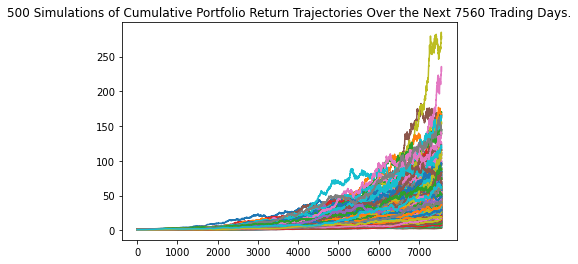

In [131]:
# Visualizing the 30-year Monte Carlo simulation by creating an overlay line plot
thirty_year_forecast.plot_simulation()

#### Step 3: Plotting the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

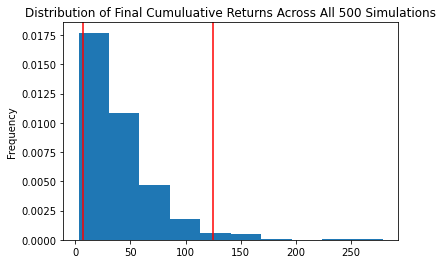

In [132]:
# Visualizing the probability distribution of the 30-year Monte Carlo simulation by plotting a histogram
thirty_year_forecast.plot_distribution()

#### Step 4: Generating the summary statistics for the Monte Carlo simulation.

In [133]:
thirty_year_forecast_statistics = thirty_year_forecast.summarize_cumulative_return()

thirty_year_forecast_statistics

count           500.000000
mean             40.453487
std              32.734160
min               3.071761
25%              18.994831
50%              31.657778
75%              51.912459
max             278.713640
95% CI Lower      7.160322
95% CI Upper    124.880121
Name: 7560, dtype: float64

### Analyzing the Retirement Portfolio Forecasts in order to see what are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval


In [134]:
print(f"The current balance of the stock and bond porttion of the portfoio is ${total_stocks_bonds: .2f}")

The current balance of the stock and bond porttion of the portfoio is $ 70973.20


In [135]:
ci_lower_thirty_cumulative_return = thirty_year_forecast_statistics[8] * total_portfolio
ci_upper_thirty_cumulative_return = thirty_year_forecast_statistics[9] * total_portfolio

print(f"There is a 95% chance that an initial investment of ${total_portfolio} over the next 30 years will end within in the range of ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}")

There is a 95% chance that an initial investment of $132036.083 over the next 30 years will end within in the range of $ 945420.91 and $ 16488682.02


### Forecast Cumulative Returns for 10 Years from now

In [136]:
# Configurating a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights are split 20% to AGG and 80% to SPY.
ten_year_forecast = MCSimulation(
  portfolio_data = historical_closing_prices_df,
  weights = [.20,.80],
  num_simulation = 500,
  num_trading_days = 252*10
)

# Reviewing the simulation input data
ten_year_forecast.portfolio_data.head()

AGG                                        \
                             open     high      low     close    volume   
time                                                                      
2019-01-28 00:00:00-05:00  106.62  106.745  106.580  106.6550   6372589   
2019-01-29 00:00:00-05:00  106.73  106.910  106.685  106.9063   5399892   
2019-01-30 00:00:00-05:00  106.79  107.140  106.790  107.1400   4948983   
2019-01-31 00:00:00-05:00  107.30  107.530  107.290  107.4600  11394113   
2019-02-01 00:00:00-05:00  107.09  107.150  106.880  106.9600   5325410   

                                           SPY                            \
                          daily_return    open    high     low     close   
time                                                                       
2019-01-28 00:00:00-05:00          NaN  263.39  263.82  261.79  263.6350   
2019-01-29 00:00:00-05:00     0.002356  263.92  264.55  262.48  263.3100   
2019-01-30 00:00:00-05:00     0.002186  265.10  268.52  264.25  267.4625   
2019-01-31 00:00:00-05:00     0.002987  267.51  270.47  267.27  270.2325   
2019-02-01 00:00:00-05:00    -0.004653  270.15  271.20  269.18  270.0700   

                                                  
                             volume daily_return  
time                                              
2019-01-28 00:00:00-05:00  75207990          NaN  
2019-01-29 00:00:00-05:00  54249161    -0.001233  
2019-01-30 00:00:00-05:00  75091893     0.015770  
2019-01-31 00:00:00-05:00  73699733     0.010357  
2019-02-01 00:00:00-05:00  68194167    -0.000601

In [137]:
# Running the Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_forecast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Magda\Desktop\FinTech-Workspace\Week_5\financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993006,1.006844,0.991001,0.998841,0.999518,1.002278,1.022906,1.004609,1.007463,1.011814,...,1.009828,1.003307,1.007158,1.015348,1.013289,1.011648,0.974978,1.005374,0.999370,1.011603
2,0.982467,1.004482,0.982582,1.005723,0.997003,1.025349,1.053077,1.028277,0.997665,1.020432,...,1.033231,0.999151,1.022360,1.029421,1.027967,1.011584,0.989263,1.018707,0.981902,1.010538
3,0.975850,1.019755,0.984827,1.021561,0.977950,1.022227,1.066971,1.017328,1.006325,1.034254,...,1.016121,0.996286,1.025856,1.020713,1.024706,1.014704,0.999183,1.016570,0.997049,1.006630
4,0.977910,1.020667,1.003772,1.032894,0.990047,1.033529,1.077857,1.023593,1.009661,1.046901,...,1.016374,0.989436,1.013969,1.020572,1.032236,1.030718,0.978297,1.014093,0.993988,1.000717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.350859,9.688227,6.784950,1.400283,2.191222,5.799143,5.456043,6.113405,7.209566,2.329624,...,3.309548,9.343792,8.166853,7.525676,5.859434,2.571489,6.069905,4.375072,2.169314,5.101363
2517,5.390425,9.441263,6.745638,1.412540,2.179103,5.717289,5.463478,6.128437,7.183285,2.332673,...,3.329004,9.199330,8.251355,7.465463,5.803857,2.523494,6.032592,4.370841,2.152347,5.176750
2518,5.366609,9.576771,6.814859,1.409407,2.204324,5.773298,5.433978,6.009188,7.280745,2.356635,...,3.271371,9.217688,8.328367,7.507201,5.781366,2.518580,5.983670,4.374892,2.142315,5.080154
2519,5.296616,9.571670,6.894385,1.451496,2.190441,5.784850,5.295566,6.072120,7.260490,2.376939,...,3.284791,9.239717,8.254673,7.336759,5.847124,2.513071,6.057991,4.367269,2.129658,5.163452


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

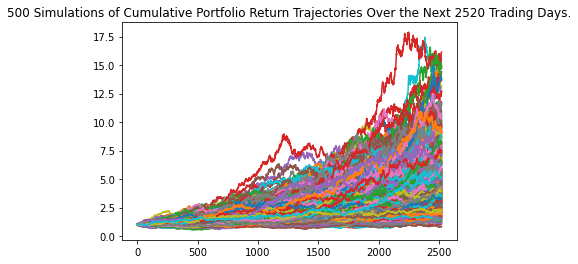

In [138]:
# Visualizing the 10-year Monte Carlo simulation by creating an overlay line plot
ten_year_forecast.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

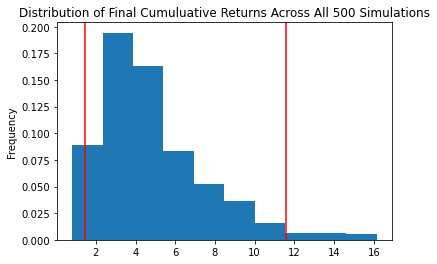

In [139]:
# Visualizing the probability distribution of the 10-year Monte Carlo simulation by plotting a histogram
ten_year_forecast.plot_distribution()

In [140]:
# Generating summary statistics and saving the results as a variable
ten_year_forecast_statistics = ten_year_forecast.summarize_cumulative_return()

ten_year_forecast_statistics

count           500.000000
mean              4.842428
std               2.680634
min               0.810231
25%               2.915644
50%               4.304927
75%               5.877598
max              16.138734
95% CI Lower      1.474773
95% CI Upper     11.586610
Name: 2520, dtype: float64

### Questions to answer:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [141]:
print(f"The current balance of the stock and bond porttion of the portfoio is ${total_stocks_bonds: .2f}")

The current balance of the stock and bond porttion of the portfoio is $ 70973.20


In [142]:
# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = ten_year_forecast_statistics[8] * total_portfolio
ci_upper_ten_cumulative_return = ten_year_forecast_statistics[9] * total_portfolio

print(f"There is a 95% chance that an initial investment of ${total_portfolio} over the next 10 years will end within in the range of ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}")

There is a 95% chance that an initial investment of $132036.083 over the next 10 years will end within in the range of $ 194723.32 and $ 1529850.62


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Answer** Weighting the portfolio more heavily to stocks will not allow the credit union members to retire after 10 years. Firstly, the returns of the more heavily weighted portfolio are lower and secondly, when people save for retirement, they usually tend to be more conservative in their invesments.